In [8]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise import KNNBasic, SVD, NMF, SlopeOne, CoClustering

In [10]:
# Load the first three columns from the data file
file_path = './ml-100k/u.data'
columns = ['user_id', 'item_id', 'rating']
df = pd.read_csv(file_path, sep='\t', header=None, usecols=[0, 1, 2], names=columns)

# Display the loaded DataFrame
df.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [12]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)

# Define the algorithms to compare
algorithms = {
    "KNNBasic": KNNBasic(),
    "SVD": SVD(),
    "NMF": NMF(),
    "SlopeOne": SlopeOne(),
    "CoClustering": CoClustering()
}

# Perform cross-validation and collect results
results = {}
for name, algo in algorithms.items():
    cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    results[name] = {
        "RMSE": cv_results['test_rmse'].mean(),
        "MAE": cv_results['test_mae'].mean()
    }

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9741  0.9769  0.9776  0.9872  0.9783  0.9788  0.0044  
MAE (testset)     0.7689  0.7720  0.7735  0.7776  0.7729  0.7730  0.0028  
Fit time          0.21    0.21    0.22    0.23    0.20    0.21    0.01    
Test time         2.01    1.92    1.90    1.88    1.84    1.91    0.06    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9383  0.9349  0.9315  0.9413  0.9322  0.9356  0.0037

In [14]:
# Display results
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="RMSE")
print(results_df)

                  RMSE       MAE
SVD           0.935602  0.738129
SlopeOne      0.944488  0.742767
NMF           0.964616  0.758718
CoClustering  0.967357  0.757609
KNNBasic      0.978818  0.772965


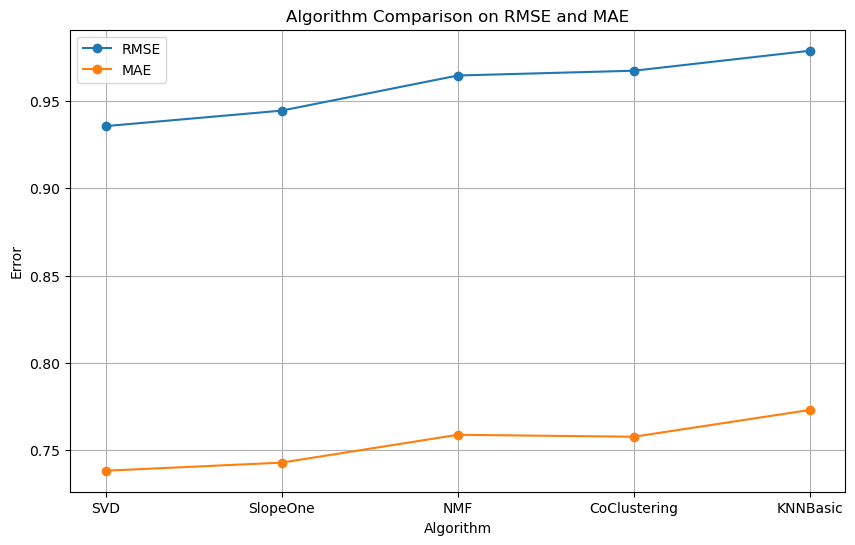

In [18]:
import matplotlib.pyplot as plt

# Sample data for results_df provided by the user
results_df = pd.DataFrame({
    "RMSE": [0.935602, 0.944488, 0.964616, 0.967357, 0.978818],
    "MAE": [0.738129, 0.742767, 0.758718, 0.757609, 0.772965]
}, index=["SVD", "SlopeOne", "NMF", "CoClustering", "KNNBasic"])

# Plotting RMSE and MAE
plt.figure(figsize=(10, 6))

# Plotting RMSE
plt.plot(results_df.index, results_df['RMSE'], marker='o', label='RMSE')
# Plotting MAE
plt.plot(results_df.index, results_df['MAE'], marker='o', label='MAE')

# Adding labels and title
plt.xlabel('Algorithm')
plt.ylabel('Error')
plt.title('Algorithm Comparison on RMSE and MAE')
plt.legend()
plt.grid()

plt.show()